In [45]:
import pandas as pd
from datetime import datetime
import re

## DIE ZEIT

In [775]:
zeit_df=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/zeit_corona.csv")
zeit_df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [776]:
zeit_df2=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/zeit_astrazeneca.csv")
zeit_df2.drop(["Unnamed: 0"], axis=1, inplace=True)

In [777]:
zeit_df3=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/zeit_biontech.csv")
zeit_df3.drop(["Unnamed: 0"], axis=1, inplace=True)

In [778]:
zeit_df4=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/zeit_curevac.csv")
zeit_df4.drop(["Unnamed: 0"], axis=1, inplace=True)

In [779]:
zeit_df5=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/zeit_johnson.csv")
zeit_df5.drop(["Unnamed: 0"], axis=1, inplace=True)

In [780]:
zeit_df6=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/zeit_moderna.csv")
zeit_df6.drop(["Unnamed: 0"], axis=1, inplace=True)

In [781]:
zeit=pd.concat([zeit_df,zeit_df2,zeit_df3,zeit_df4,zeit_df5,zeit_df6],axis=0)
zeit.reset_index(drop=True, inplace=True)
zeit

,title,release_date,snippet,teaser_text,teaser_title,href
0,Noch 'ne Runde!,2020-03-21T19:29:55Z,tatsächlich auch für Erwachsene nicht langwei...,Spätestens nach einem Tag Homeoffice und Homes...,Noch 'ne Runde!,http://www.zeit.de/kultur/2020-03/gesellschaft...
1,Gewinnen ist was für Verlierer?,2020-03-21T19:28:56Z,"mir schweigend Möglichkeiten aus, ein bessere...",Klar ist: Wir sollen zu Hause bleiben. Dort ha...,Gewinnen ist was für Verlierer?,http://www.zeit.de/kultur/2020-03/corona-quara...
2,Corona und der Staat,2020-03-21T19:24:03Z,dennoch nicht allzu vorsichtig sein. Denn wer...,Die Regierenden testen in der Coronakrise gese...,Corona und der Staat,http://www.zeit.de/kultur/2020-03/staat-ausnah...
3,"""Kleine Änderungen im Alltag können viel bewir...",2020-03-21T19:08:31Z,provisorischen <em>Corona</em>-Krankenhäusern...,"Du Mingjun lebt in Wuhan, dem Ursprungsort der...","""Kleine Änderungen im Alltag können viel bewir...",http://www.zeit.de/gesellschaft/zeitgeschehen/...
4,"""Eigentlich wäre ich jetzt gerne bei meiner Fa...",2020-03-21T18:07:50Z,"Eigentlich wollten sie den Sommer in Italien, ...","Ausgangssperren, die Unis sind zu, die Flüge g...","""Eigentlich wäre ich jetzt gerne bei meiner Fa...",http://www.zeit.de/campus/2020-03/auslandsseme...
...,...,...,...,...,...,...
10174,Jetzt sind wir dran!,2021-03-17T16:01:50Z,Fernsehbilder aus Europa und den USA. Auf die...,In vielen ärmeren Ländern haben die Impfungen ...,Jetzt sind wir dran!,http://www.zeit.de/2021/12/globale-impfstoffve...
10175,Impfgipfel von Bund und Ländern auf Freitag ve...,2021-03-16T10:45:04Z,"zugelassenen Mittel von BioNTech/Pfizer, <em>...","Wie geht es weiter mit AstraZeneca, wann impfe...",Impfgipfel von Bund und Ländern auf Freitag ve...,http://www.zeit.de/politik/deutschland/2021-03...
10176,"""Manche behaupteten, sie hätten ein Attest geg...",2021-03-15T13:36:29Z,?\nKlages: Erst seit etwa zwei Wochen. Wir ver...,"Liam Klages, 20, leitet ein Impfzentrum. Im Ge...","""Manche behaupteten, sie hätten ein Attest geg...",http://www.zeit.de/arbeit/2021-03/astrazeneca-...
10177,Russischer Corona-Impfstoff soll in Deutschlan...,2021-03-15T11:16:34Z,. Bei den bisher von der Ema zugelassenen Coro...,Russland hat nach eigenen Angaben Abkommen mit...,Russischer Corona-Impfstoff soll in Deutschlan...,http://www.zeit.de/wissen/2021-03/sputnik-v-ru...


In [782]:
def data_clean(x):
    x=str(x)
    return x[:10]

In [783]:
zeit["release_date"]=zeit["release_date"].apply(lambda x: data_clean(x))

In [784]:
zeit["snippet"]=zeit["snippet"].apply(lambda x: re.sub("<em>", "", x))
zeit["snippet"]=zeit["snippet"].apply(lambda x: re.sub("</em>", "", x))
zeit["snippet"]=zeit["snippet"].apply(lambda x: re.sub("\n", " ", x))

In [785]:
zeit["original_headline"]=zeit["title"]+zeit["snippet"]+" "+zeit["teaser_text"]

In [787]:
zeit["original_headline"][0]

"Noch 'ne Runde! tatsächlich auch für Erwachsene nicht langweilig. (Für 2 bis 7 Spieler, ab 4 Jahren)Simone Gaul Eine Krise braucht Bilder, muss begreifbar werden durch Metaphern. Die derzeitige Corona-Krise sickert nur Spätestens nach einem Tag Homeoffice und Homeschooling haben sich alle eine Partie Spaß verdient. Die Gesellschaftsspiele-Tipps der ZEIT ONLINE-Redaktion"

In [788]:
#zeit["teaser_text"]=zeit["teaser_text"].apply(lambda x: re.sub("<em>", "", x))
#zeit["teaser_text"]=zeit["teaser_text"].apply(lambda x: re.sub("</em>", "", x))
#zeit["teaser_text"]=zeit["teaser_text"].apply(lambda x: re.sub("\n", "", x))

In [789]:
import re
import string

def cleaning_punctuation(x):
    x=str(x)
    x=x.lower()
    remove = string.punctuation
    remove = remove.replace("-", "")
    remove = remove.replace("/", "")
    remove = remove.replace("&", "")# don't remove hyphens
    pattern = r"[{}]".format(remove)
    x=re.sub(pattern, "", x)
    return x

In [790]:
zeit["title"]=zeit["title"].apply(lambda x: cleaning_punctuation(x))
zeit["snippet"]=zeit["snippet"].apply(lambda x: cleaning_punctuation(x))
zeit["teaser_text"]=zeit["teaser_text"].apply(lambda x: cleaning_punctuation(x))
zeit["teaser_title"]=zeit["teaser_title"].apply(lambda x: cleaning_punctuation(x))

In [791]:
zeit.drop_duplicates(inplace=True)

#### Removing stopwords

In [792]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carolinvogt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [793]:
german_stop_words = stopwords.words('german')
vect = CountVectorizer(stop_words = german_stop_words)

In [794]:
zeit_copy=zeit

In [795]:
def stop_word_removal(x):
    token = x.split()
    return ' '.join([w for w in token if not w in german_stop_words])

In [796]:
cols=['title',
 'snippet',
 'teaser_text',
 'teaser_title']
cols

['title', 'snippet', 'teaser_text', 'teaser_title']

In [797]:
for col in cols:
    zeit_copy[col]=zeit_copy[col].apply(lambda x: stop_word_removal(x))
    
zeit_copy

,title,release_date,snippet,teaser_text,teaser_title,href,original_headline
0,ne runde,2020-03-21,tatsächlich erwachsene langweilig 2 7 spieler ...,spätestens tag homeoffice homeschooling partie...,ne runde,http://www.zeit.de/kultur/2020-03/gesellschaft...,Noch 'ne Runde! tatsächlich auch für Erwachsen...
1,gewinnen verlierer,2020-03-21,schweigend möglichkeiten besserer mensch okay ...,klar sollen hause bleiben zeit gesellschaftssp...,gewinnen verlierer,http://www.zeit.de/kultur/2020-03/corona-quara...,Gewinnen ist was für Verlierer? mir schweigend...
2,corona staat,2020-03-21,dennoch allzu vorsichtig wer rechtzeitig hande...,regierenden testen coronakrise gesetzliche gre...,corona staat,http://www.zeit.de/kultur/2020-03/staat-ausnah...,Corona und der Staat dennoch nicht allzu vorsi...
3,kleine änderungen alltag bewirken,2020-03-21,provisorischen corona-krankenhäusern quarantän...,mingjun lebt wuhan ursprungsort coronavirus-pa...,kleine änderungen alltag bewirken,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"""Kleine Änderungen im Alltag können viel bewir..."
4,eigentlich wäre gerne familie,2020-03-21,eigentlich wollten sommer italien spanien slow...,ausgangssperren unis flüge gestrichen corona-k...,eigentlich wäre gerne familie,http://www.zeit.de/campus/2020-03/auslandsseme...,"""Eigentlich wäre ich jetzt gerne bei meiner Fa..."
...,...,...,...,...,...,...,...
10157,trotz astrazeneca-impfstaus lehnt bundesregier...,2021-03-01,astrazeneca öffentlich impfen lassen sollten w...,ende woche sollen mehr million dosen vakzine a...,trotz astrazeneca-impfstaus lehnt bundesregier...,http://www.zeit.de/politik/deutschland/2021-03...,Trotz AstraZeneca-Impfstaus lehnt Bundesregier...
10159,thüringen stoppt vergabe impfterminen,2021-03-13,gesundheitsministeriums erfurt sollten dafür k...,astrazeneca liefert erneut weniger impfstoff z...,thüringen stoppt vergabe impfterminen,http://www.zeit.de/wissen/gesundheit/2021-03/c...,Thüringen stoppt Vergabe von Impfterminen Gesu...
10160,große impfversprechen,2021-03-12,skizziert möglichen ablauf praxen bestellen je...,ab april 700000 impfungen pro tag kanzlerin zu...,große impfversprechen,http://www.zeit.de/politik/2021-03/corona-impf...,Das große Impfversprechen skizziert einen mögl...
10165,jens spahn lässt abweichungen impfpriorisierung,2021-03-10,moderna abstand zweitimpfung sechs wochen ausg...,altersbeschränkung mehr astrazeneca größerer a...,jens spahn lässt abweichungen impfpriorisierung,http://www.zeit.de/wissen/gesundheit/2021-03/j...,Jens Spahn lässt Abweichungen von Impfpriorisi...


In [798]:
#!python -m spacy download de_core_news_sm

#import spacy

nlp = spacy.load('de_core_news_sm')

In [799]:
def lemmatizer(x):
    token = nlp(x)
    #x.lemma_
    return ' '.join([t.lemma_ for t in token])

In [800]:
cols=['title',
 'snippet',
 'teaser_text',
 'teaser_title']

In [801]:
for col in cols:
    zeit_copy[col]=zeit_copy[col].apply(lambda x: lemmatizer(x))

In [802]:
zeit_copy

,title,release_date,snippet,teaser_text,teaser_title,href,original_headline
0,ne runden,2020-03-21,tatsächlich erwachsen langweilig 2 7 spieler a...,spätestens tag homeoffice homeschooling partie...,ne runden,http://www.zeit.de/kultur/2020-03/gesellschaft...,Noch 'ne Runde! tatsächlich auch für Erwachsen...
1,gewinnen verlierer,2020-03-21,schweigen möglichkeiten gut mensch okay vielle...,klaren sollen hause bleiben zeit gesellschafts...,gewinnen verlierer,http://www.zeit.de/kultur/2020-03/corona-quara...,Gewinnen ist was für Verlierer? mir schweigend...
2,corona staat,2020-03-21,dennoch allzu vorsichtig wer rechtzeitig hande...,regierend testen coronakrise gesetzliche grenz...,corona staat,http://www.zeit.de/kultur/2020-03/staat-ausnah...,Corona und der Staat dennoch nicht allzu vorsi...
3,kleine änderungen alltag bewirken,2020-03-21,provisorisch corona-krankenhäusern quarantäne-...,mingjun leben wuhan ursprungsort coronavirus-p...,kleine änderungen alltag bewirken,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"""Kleine Änderungen im Alltag können viel bewir..."
4,eigentlich sein gerne familie,2020-03-21,eigentlich wollen sommer italien spanien slowe...,ausgangssperren unis flüge streichen corona-kr...,eigentlich sein gerne familie,http://www.zeit.de/campus/2020-03/auslandsseme...,"""Eigentlich wäre ich jetzt gerne bei meiner Fa..."
...,...,...,...,...,...,...,...
10157,trotzen astrazeneca-impfstaus lehnen bundesreg...,2021-03-01,astrazeneca öffentlich impfen lassen sollen wi...,ende woche sollen mehr million dosen vakzine a...,trotzen astrazeneca-impfstaus lehnen bundesreg...,http://www.zeit.de/politik/deutschland/2021-03...,Trotz AstraZeneca-Impfstaus lehnt Bundesregier...
10159,thüringen stoppen vergabe impfterminen,2021-03-13,gesundheitsministeriums erfurt sollen dafür kn...,astrazeneca liefern erneut wenig impfstoff zei...,thüringen stoppen vergabe impfterminen,http://www.zeit.de/wissen/gesundheit/2021-03/c...,Thüringen stoppt Vergabe von Impfterminen Gesu...
10160,groß impfversprechen,2021-03-12,skizzieren möglich ablauf praxen bestellen jew...,ab april 700000 impfungen pro tag kanzlerin zu...,groß impfversprechen,http://www.zeit.de/politik/2021-03/corona-impf...,Das große Impfversprechen skizziert einen mögl...
10165,jens spahn lässt abweichungen impfpriorisierung,2021-03-10,moderna abstand zweitimpfung sechs wochen auss...,altersbeschränkung mehr astrazeneca groß absta...,jens spahn lässt abweichungen impfpriorisierung,http://www.zeit.de/wissen/gesundheit/2021-03/j...,Jens Spahn lässt Abweichungen von Impfpriorisi...


In [803]:
zeit_copy["teaser_title"][0]

'ne runden'

In [804]:
zeit_copy["snippet"][0]

'tatsächlich erwachsen langweilig 2 7 spieler ab 4 jahrensimone gaul krise brauchen bilder begreifbar metaphern derzeitig corona-krise sickert'

In [805]:
zeit_covid=zeit_copy

In [806]:
zeit_covid["release_date"]=zeit_covid["release_date"].apply(lambda x: re.sub(' ', "", x))

In [807]:
zeit_covid["newspaper"]=zeit_covid["teaser_title"].apply(lambda x: "Die Zeit")

In [808]:
zeit_covid["headline"]=zeit_covid["title"]+zeit_covid["snippet"]+zeit_covid["teaser_text"]

In [809]:
zeit_covid

,title,release_date,snippet,teaser_text,teaser_title,href,original_headline,newspaper,headline
0,ne runden,2020-03-21,tatsächlich erwachsen langweilig 2 7 spieler a...,spätestens tag homeoffice homeschooling partie...,ne runden,http://www.zeit.de/kultur/2020-03/gesellschaft...,Noch 'ne Runde! tatsächlich auch für Erwachsen...,Die Zeit,ne rundentatsächlich erwachsen langweilig 2 7 ...
1,gewinnen verlierer,2020-03-21,schweigen möglichkeiten gut mensch okay vielle...,klaren sollen hause bleiben zeit gesellschafts...,gewinnen verlierer,http://www.zeit.de/kultur/2020-03/corona-quara...,Gewinnen ist was für Verlierer? mir schweigend...,Die Zeit,gewinnen verliererschweigen möglichkeiten gut ...
2,corona staat,2020-03-21,dennoch allzu vorsichtig wer rechtzeitig hande...,regierend testen coronakrise gesetzliche grenz...,corona staat,http://www.zeit.de/kultur/2020-03/staat-ausnah...,Corona und der Staat dennoch nicht allzu vorsi...,Die Zeit,corona staatdennoch allzu vorsichtig wer recht...
3,kleine änderungen alltag bewirken,2020-03-21,provisorisch corona-krankenhäusern quarantäne-...,mingjun leben wuhan ursprungsort coronavirus-p...,kleine änderungen alltag bewirken,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"""Kleine Änderungen im Alltag können viel bewir...",Die Zeit,kleine änderungen alltag bewirkenprovisorisch ...
4,eigentlich sein gerne familie,2020-03-21,eigentlich wollen sommer italien spanien slowe...,ausgangssperren unis flüge streichen corona-kr...,eigentlich sein gerne familie,http://www.zeit.de/campus/2020-03/auslandsseme...,"""Eigentlich wäre ich jetzt gerne bei meiner Fa...",Die Zeit,eigentlich sein gerne familieeigentlich wollen...
...,...,...,...,...,...,...,...,...,...
10157,trotzen astrazeneca-impfstaus lehnen bundesreg...,2021-03-01,astrazeneca öffentlich impfen lassen sollen wi...,ende woche sollen mehr million dosen vakzine a...,trotzen astrazeneca-impfstaus lehnen bundesreg...,http://www.zeit.de/politik/deutschland/2021-03...,Trotz AstraZeneca-Impfstaus lehnt Bundesregier...,Die Zeit,trotzen astrazeneca-impfstaus lehnen bundesreg...
10159,thüringen stoppen vergabe impfterminen,2021-03-13,gesundheitsministeriums erfurt sollen dafür kn...,astrazeneca liefern erneut wenig impfstoff zei...,thüringen stoppen vergabe impfterminen,http://www.zeit.de/wissen/gesundheit/2021-03/c...,Thüringen stoppt Vergabe von Impfterminen Gesu...,Die Zeit,thüringen stoppen vergabe impfterminengesundhe...
10160,groß impfversprechen,2021-03-12,skizzieren möglich ablauf praxen bestellen jew...,ab april 700000 impfungen pro tag kanzlerin zu...,groß impfversprechen,http://www.zeit.de/politik/2021-03/corona-impf...,Das große Impfversprechen skizziert einen mögl...,Die Zeit,groß impfversprechenskizzieren möglich ablauf ...
10165,jens spahn lässt abweichungen impfpriorisierung,2021-03-10,moderna abstand zweitimpfung sechs wochen auss...,altersbeschränkung mehr astrazeneca groß absta...,jens spahn lässt abweichungen impfpriorisierung,http://www.zeit.de/wissen/gesundheit/2021-03/j...,Jens Spahn lässt Abweichungen von Impfpriorisi...,Die Zeit,jens spahn lässt abweichungen impfpriorisierun...


In [810]:
zeit_covid["headline"][0]

'ne rundentatsächlich erwachsen langweilig 2 7 spieler ab 4 jahrensimone gaul krise brauchen bilder begreifbar metaphern derzeitig corona-krise sickertspätestens tag homeoffice homeschooling partie spaß verdienen gesellschaftsspiele-tipps zeit online-redaktion'

#### cleaning href 

In [811]:
def hrefs_ids(href):
    first_part = href.split("http://www.zeit.de/")
    id_tag = first_part[1].split('/')
    return id_tag[0]

In [812]:
zeit_covid["channel"]=zeit_covid["href"].apply(lambda x: hrefs_ids(x))

In [813]:
zeit_covid["channel"].value_counts()

politik         3090
wissen          1181
2020            1129
gesellschaft     992
wirtschaft       835
kultur           458
hamburg          457
2021             342
sport            333
arbeit           280
zeit-magazin     184
mobilitaet       183
digital          168
campus           137
entdecken        104
wq                29
zett              17
2020-07            3
2020-06            3
2020-08            2
2021-01            2
2020-10            2
2020-09            2
2020-12            2
2020-11            1
die-antwort        1
2021-03            1
embed              1
z2x                1
2021-02            1
news               1
Name: channel, dtype: int64

In [814]:
to_drop=["sport", "wq"]
print("Before deleting channels: ", zeit_covid.shape)
zeit_covid = zeit_copy[~zeit_covid['channel'].isin(to_drop)]
print("After deleting channels: ", zeit_covid.shape)

Before deleting channels:  (9942, 10)
After deleting channels:  (9580, 10)


In [815]:
counts=zeit_covid["channel"].value_counts()
print("Before deleting channels: ", zeit_covid.shape)
zeit_covid = zeit_covid[~zeit_covid['channel'].isin(counts[counts < 2].index)]
print("After deleting channels: ", zeit_covid.shape)

Before deleting channels:  (9580, 10)
After deleting channels:  (9573, 10)


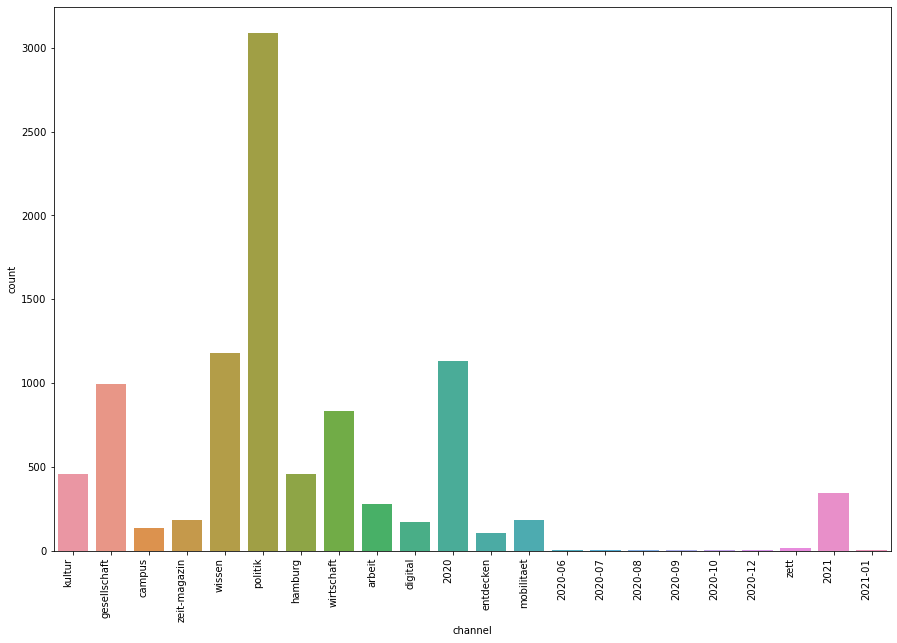

In [816]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x="channel", data=zeit_covid)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [818]:
news_dict = {}

for i in list(zeit_covid.index):
    #cleaning words_list for every index
    words_list=[]
    words_list+=zeit_covid["headline"][i].split(' ')
    words_set=set(words_list)
    for x in words_list:
        if x not in news_dict:
            news_dict[x] = 1
        else:
            news_dict[x] += 1

In [822]:
sort_zeit = sorted(news_dict.items(), key=lambda x: x[1], reverse=True)
sort_zeit

[('–', 2175),
 ('corona-krise', 2038),
 ('corona', 1905),
 ('mehr', 1735),
 ('corona-pandemie', 1545),
 ('menschen', 1439),
 ('werden', 1404),
 ('viel', 1346),
 ('deutschland', 1234),
 ('sagen', 1162),
 ('geben', 1106),
 ('wegen', 1105),
 ('sein', 1100),
 ('gehen', 1010),
 ('gut', 972),
 ('kommen', 871),
 ('sollen', 867),
 ('seit', 846),
 ('groß', 822),
 ('neue', 812),
 ('neu', 802),
 ('deutsch', 738),
 ('wenig', 728),
 ('erst', 717),
 ('pandemie', 711),
 ('zeit', 672),
 ('schon', 619),
 ('weit', 613),
 ('zeigen', 569),
 ('millionen', 553),
 ('stehen', 552),
 ('machen', 549),
 ('müssen', 542),
 ('dürfen', 538),
 ('jahr', 536),
 ('fordern', 531),
 ('trump', 528),
 ('bleiben', 527),
 ('sehen', 492),
 ('prozent', 491),
 ('immer', 488),
 ('euro', 486),
 ('hoch', 484),
 ('usa', 479),
 ('steigen', 471),
 ('ab', 461),
 ('eu', 460),
 ('laut', 456),
 ('krise', 451),
 ('biontech', 449),
 ('warum', 446),
 ('melden', 438),
 ('halten', 430),
 ('können', 430),
 ('leben', 427),
 ('fragen', 424),
 ('z

In [823]:
keywords_zeit=pd.DataFrame()

keywords_zeit["keyword"]=[sort_zeit[i][0] for i in range(len(sort_zeit))]
keywords_zeit["count"]=[sort_zeit[i][1] for i in range(len(sort_zeit))]

keywords_zeit=keywords_zeit[keywords_zeit["count"]>25]

In [824]:
print(len(sort_zeit))
print(len(keywords_zeit["keyword"]))

55382
1615


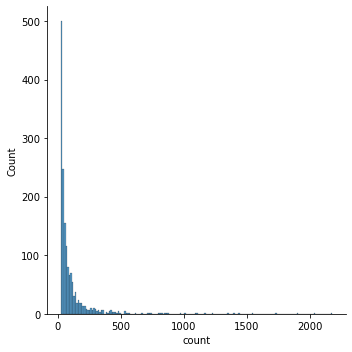

In [825]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(keywords_zeit["count"])
plt.show()

In [826]:
dic_corona=sort_zeit[:1615]

In [829]:
dic_corona=dic_corona[1:]
dic_corona

[('corona', 1905),
 ('mehr', 1735),
 ('corona-pandemie', 1545),
 ('menschen', 1439),
 ('werden', 1404),
 ('viel', 1346),
 ('deutschland', 1234),
 ('sagen', 1162),
 ('geben', 1106),
 ('wegen', 1105),
 ('sein', 1100),
 ('gehen', 1010),
 ('gut', 972),
 ('kommen', 871),
 ('sollen', 867),
 ('seit', 846),
 ('groß', 822),
 ('neue', 812),
 ('neu', 802),
 ('deutsch', 738),
 ('wenig', 728),
 ('erst', 717),
 ('pandemie', 711),
 ('zeit', 672),
 ('schon', 619),
 ('weit', 613),
 ('zeigen', 569),
 ('millionen', 553),
 ('stehen', 552),
 ('machen', 549),
 ('müssen', 542),
 ('dürfen', 538),
 ('jahr', 536),
 ('fordern', 531),
 ('trump', 528),
 ('bleiben', 527),
 ('sehen', 492),
 ('prozent', 491),
 ('immer', 488),
 ('euro', 486),
 ('hoch', 484),
 ('usa', 479),
 ('steigen', 471),
 ('ab', 461),
 ('eu', 460),
 ('laut', 456),
 ('krise', 451),
 ('biontech', 449),
 ('warum', 446),
 ('melden', 438),
 ('halten', 430),
 ('können', 430),
 ('leben', 427),
 ('fragen', 424),
 ('zwei', 424),
 ('land', 423),
 ('ende', 4

# SPIEGEL

In [830]:
spiegel_df=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/spiegel.csv")
spiegel_df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [831]:
spiegel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41528 entries, 0 to 41527
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             41528 non-null  object
 1   headline        41528 non-null  object
 2   is_paid         41528 non-null  bool  
 3   date_published  41527 non-null  object
 4   channel         41527 non-null  object
dtypes: bool(1), object(4)
memory usage: 1.3+ MB


In [832]:
spiegel_df

,url,headline,is_paid,date_published,channel
0,https://www.spiegel.de/panorama/chile-raeuber-...,Chile: Räuber erbeuten 15 Millionen Dollar in bar,False,2020-03-09 23:28:00,Panorama
1,https://www.spiegel.de/sport/coronavirus-serie...,Coronavirus: Italien sagt alle Sportveranstalt...,False,2020-03-09 23:21:00,Sport
2,https://www.spiegel.de/panorama/justiz/harvey-...,Nach Herz-OP: Weinstein verletzt sich bei Stur...,False,2020-03-09 22:54:00,Panorama
3,https://www.spiegel.de/sport/fussball/arminia-...,Topspiel der 2. Bundesliga: Bielefeld wehrt de...,False,2020-03-09 22:26:00,Sport
4,https://www.spiegel.de/panorama/italien-weitet...,"Coronavirus: Italien weitet ""rote Zone"" auf da...",False,2020-03-09 21:57:00,Panorama
...,...,...,...,...,...
41523,https://www.spiegel.de/wirtschaft/norwegischer...,Chef des Norwegischen Staatsfonds: Was Sie vom...,False,2021-03-24 00:43:00,Wirtschaft
41524,https://www.spiegel.de/reise/luxustourismus-tr...,Luxustourismus trotz Corona: Der Tegernsee wir...,False,2021-03-24 00:43:00,Reise
41525,https://www.spiegel.de/netzwelt/web/twitter-er...,24 Zeichen: Erster Tweet der Welt bringt bei A...,False,2021-03-24 00:43:00,Netzwelt
41526,https://www.spiegel.de/netzwelt/web/digitale-k...,Digitale Kopie: GMX und Web.de verraten jetzt ...,False,2021-03-24 00:39:00,Netzwelt


## SPIEGEL: Cleaning DataFrame

#### 1. clean date

In [833]:
def data_clean(x):
    x=str(x)
    return x[:10]

In [834]:
spiegel_df["date_published"]=spiegel_df["date_published"].apply(lambda x: data_clean(x))

In [835]:
spiegel_df["date_published"][0]

'2020-03-09'

In [836]:
spiegel_df["headline"]=spiegel_df["headline"].apply(lambda x: cleaning_punctuation(x))

In [837]:
spiegel_df["original_headline"]=spiegel_df["headline"]

In [838]:
spiegel_df["headline"]=spiegel_df["headline"].apply(lambda x: stop_word_removal(x))

In [839]:
spiegel_df["headline"]=spiegel_df["headline"].apply(lambda x: lemmatizer(x))

In [840]:
spiegel_df

,url,headline,is_paid,date_published,channel,original_headline
0,https://www.spiegel.de/panorama/chile-raeuber-...,chile räuber erbeuten 15 millionen dollar bar,False,2020-03-09,Panorama,chile räuber erbeuten 15 millionen dollar in bar
1,https://www.spiegel.de/sport/coronavirus-serie...,coronavirus italien sagen sportveranstaltungen...,False,2020-03-09,Sport,coronavirus italien sagt alle sportveranstaltu...
2,https://www.spiegel.de/panorama/justiz/harvey-...,herz-op weinstein verletzen sturz gefängnis,False,2020-03-09,Panorama,nach herz-op weinstein verletzt sich bei sturz...
3,https://www.spiegel.de/sport/fussball/arminia-...,topspiel 2 bundesliga bielefeld wehren stuttga...,False,2020-03-09,Sport,topspiel der 2 bundesliga bielefeld wehrt den ...
4,https://www.spiegel.de/panorama/italien-weitet...,coronavirus italien weiten rote zone ganze land,False,2020-03-09,Panorama,coronavirus italien weitet rote zone auf das g...
...,...,...,...,...,...,...
41523,https://www.spiegel.de/wirtschaft/norwegischer...,chef norwegisch staatsfonds 1000-milliarden-eu...,False,2021-03-24,Wirtschaft,chef des norwegischen staatsfonds was sie vom ...
41524,https://www.spiegel.de/reise/luxustourismus-tr...,luxustourismus trotzen corona tegernsee neue sylt,False,2021-03-24,Reise,luxustourismus trotz corona der tegernsee wird...
41525,https://www.spiegel.de/netzwelt/web/twitter-er...,24 zeichen erst tweet welt bringen auktion fas...,False,2021-03-24,Netzwelt,24 zeichen erster tweet der welt bringt bei au...
41526,https://www.spiegel.de/netzwelt/web/digitale-k...,digitale kopie gmx webde verraten vorab online...,False,2021-03-24,Netzwelt,digitale kopie gmx und webde verraten jetzt vo...


In [841]:
spiegel_df["headline"][0]

'chile räuber erbeuten 15 millionen dollar bar'

In [842]:
spiegel_df["original_headline"][0]

'chile räuber erbeuten 15 millionen dollar in bar'

#### 2. reduce to corona related news

In [619]:
#corona_list=["corona","rki","drosten","wieler","merkel","spahn","coronavirus","virus","lockdown","pandemie","epidemie","pcr-test","impfzentren","hausärzte","schnelltest","teststrategie","intensivbetten","covid","covid-19","impfung","impfstrategie","impfen","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","oxford","janssen"]



In [843]:
#corona_list=["corona","rki","drosten","wieler","merkel","spahn","coronavirus","virus","lockdown","pandemie","epidemie","pcr-test","impfzentren","hausärzte","schnelltest","teststrategie","intensivbetten","covid","covid-19","impfung","impfstrategie","impfen","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","oxford","janssen"]



def corona_related(x):
    temp_list=x.split(' ')

    score=0
    
    for word in temp_list:
        #print(word)
        if word in corona_list:
            score_corona=1
            #print(score)
            return score_corona
        
        elif word in list(keywords_zeit["keyword"]):
            score+=1
            #print(score)
        else:
            continue
            
    return score/(len(temp_list))

In [844]:
spiegel_df["corona_score"]=spiegel_df["headline"].apply(lambda x: corona_related(x))

In [845]:
spiegel_df[spiegel_df["corona_score"]>0.5]

,url,headline,is_paid,date_published,channel,original_headline,corona_score
1,https://www.spiegel.de/sport/coronavirus-serie...,coronavirus italien sagen sportveranstaltungen...,False,2020-03-09,Sport,coronavirus italien sagt alle sportveranstaltu...,0.857143
4,https://www.spiegel.de/panorama/italien-weitet...,coronavirus italien weiten rote zone ganze land,False,2020-03-09,Panorama,coronavirus italien weitet rote zone auf das g...,0.571429
8,https://www.spiegel.de/panorama/coronavirus-in...,coronavirus brandenburg 2250 menschen häuslich...,False,2020-03-09,Panorama,coronavirus in brandenburg bis zu 2250 mensche...,0.714286
20,https://www.spiegel.de/panorama/coronavirus-ba...,wegen coronavirus bayern veranstaltungen mehr ...,False,2020-03-09,Panorama,wegen coronavirus bayern will veranstaltungen ...,0.625000
25,https://www.spiegel.de/panorama/fluechtlingshi...,ort fünf geflüchtete mehr aufnehmen – lösung k...,False,2020-03-09,Panorama,dieser ort würde fünf geflüchtete mehr aufnehm...,0.875000
...,...,...,...,...,...,...,...
41517,https://www.spiegel.de/wissenschaft/wann-werde...,spiegel daily podcast wann kommen coronaimpfun...,False,2021-03-24,Wissenschaft,spiegel daily podcast wann kommt die coronaimp...,0.545455
41518,https://www.spiegel.de/politik/deutschland/cor...,streitthema gottesdienste seehofer kritisieren...,False,2021-03-24,Politik,streitthema gottesdienste seehofer kritisiert ...,0.625000
41522,https://www.spiegel.de/wirtschaft/soziales/cor...,corona verschieden einkommensgruppen virus ega...,False,2021-03-24,Wirtschaft,corona in verschiedenen einkommensgruppen ist ...,0.714286
41525,https://www.spiegel.de/netzwelt/web/twitter-er...,24 zeichen erst tweet welt bringen auktion fas...,False,2021-03-24,Netzwelt,24 zeichen erster tweet der welt bringt bei au...,0.818182


In [846]:
spiegel_df[spiegel_df["corona_score"]==1]

,url,headline,is_paid,date_published,channel,original_headline,corona_score
32,https://www.spiegel.de/wissenschaft/coronaviru...,virologe drosten coronavirus absolut ernst sit...,False,2020-03-09,Wissenschaft,virologe drosten zu coronavirus es ist eine ab...,1.0
38,https://www.spiegel.de/panorama/gesellschaft/c...,nordrhein-westfalen erste todesfälle coronavir...,False,2020-03-09,Panorama,nordrhein-westfalen erste todesfälle durch cor...,1.0
168,https://www.spiegel.de/wissenschaft/medizin/co...,coronavirus wann quarantäne rechnen müssen,False,2020-03-10,Wissenschaft,coronavirus wann sie mit quarantäne rechnen mü...,1.0
219,https://www.spiegel.de/politik/deutschland/new...,lage morgen virus,False,2020-03-10,Politik,die lage am morgen das virus und wir,1.0
237,https://www.spiegel.de/politik/ausland/coronav...,corona-epidemie reichen krise umgehen,False,2020-03-11,Politik,corona-epidemie wie reiche mit der krise umgehen,1.0
...,...,...,...,...,...,...,...
41329,https://www.spiegel.de/gesundheit/diagnose/cor...,strategien vergleich impfen welt,False,2021-03-23,Gesundheit,strategien im vergleich so impft die welt,1.0
41345,https://www.spiegel.de/wirtschaft/unternehmen/...,biontech-partnerkonzern pfizer eigene mrna-imp...,False,2021-03-23,Wirtschaft,biontech-partnerkonzern pfizer will eigene mrn...,1.0
41370,https://www.spiegel.de/wirtschaft/unternehmen/...,möglich exportstopp corona-impfstoff eu-kommis...,False,2021-03-23,Wirtschaft,möglicher exportstopp für corona-impfstoff eu-...,1.0
41415,https://www.spiegel.de/wissenschaft/mensch/cor...,coronaimpfstoff astrazeneca studie möglicherwe...,False,2021-03-23,Wissenschaft,coronaimpfstoff astrazeneca hat für studie mög...,1.0


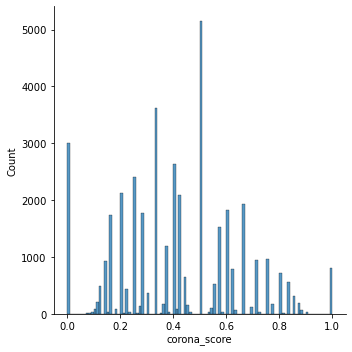

In [847]:
sns.displot(spiegel_df["corona_score"],bins=100)
plt.show()

In [848]:
index_corona=spiegel_df[spiegel_df["corona_score"]>0.5].index

In [849]:
spiegel_covid=spiegel_df.iloc[index_corona]

In [850]:
spiegel_covid

,url,headline,is_paid,date_published,channel,original_headline,corona_score
1,https://www.spiegel.de/sport/coronavirus-serie...,coronavirus italien sagen sportveranstaltungen...,False,2020-03-09,Sport,coronavirus italien sagt alle sportveranstaltu...,0.857143
4,https://www.spiegel.de/panorama/italien-weitet...,coronavirus italien weiten rote zone ganze land,False,2020-03-09,Panorama,coronavirus italien weitet rote zone auf das g...,0.571429
8,https://www.spiegel.de/panorama/coronavirus-in...,coronavirus brandenburg 2250 menschen häuslich...,False,2020-03-09,Panorama,coronavirus in brandenburg bis zu 2250 mensche...,0.714286
20,https://www.spiegel.de/panorama/coronavirus-ba...,wegen coronavirus bayern veranstaltungen mehr ...,False,2020-03-09,Panorama,wegen coronavirus bayern will veranstaltungen ...,0.625000
25,https://www.spiegel.de/panorama/fluechtlingshi...,ort fünf geflüchtete mehr aufnehmen – lösung k...,False,2020-03-09,Panorama,dieser ort würde fünf geflüchtete mehr aufnehm...,0.875000
...,...,...,...,...,...,...,...
41517,https://www.spiegel.de/wissenschaft/wann-werde...,spiegel daily podcast wann kommen coronaimpfun...,False,2021-03-24,Wissenschaft,spiegel daily podcast wann kommt die coronaimp...,0.545455
41518,https://www.spiegel.de/politik/deutschland/cor...,streitthema gottesdienste seehofer kritisieren...,False,2021-03-24,Politik,streitthema gottesdienste seehofer kritisiert ...,0.625000
41522,https://www.spiegel.de/wirtschaft/soziales/cor...,corona verschieden einkommensgruppen virus ega...,False,2021-03-24,Wirtschaft,corona in verschiedenen einkommensgruppen ist ...,0.714286
41525,https://www.spiegel.de/netzwelt/web/twitter-er...,24 zeichen erst tweet welt bringen auktion fas...,False,2021-03-24,Netzwelt,24 zeichen erster tweet der welt bringt bei au...,0.818182


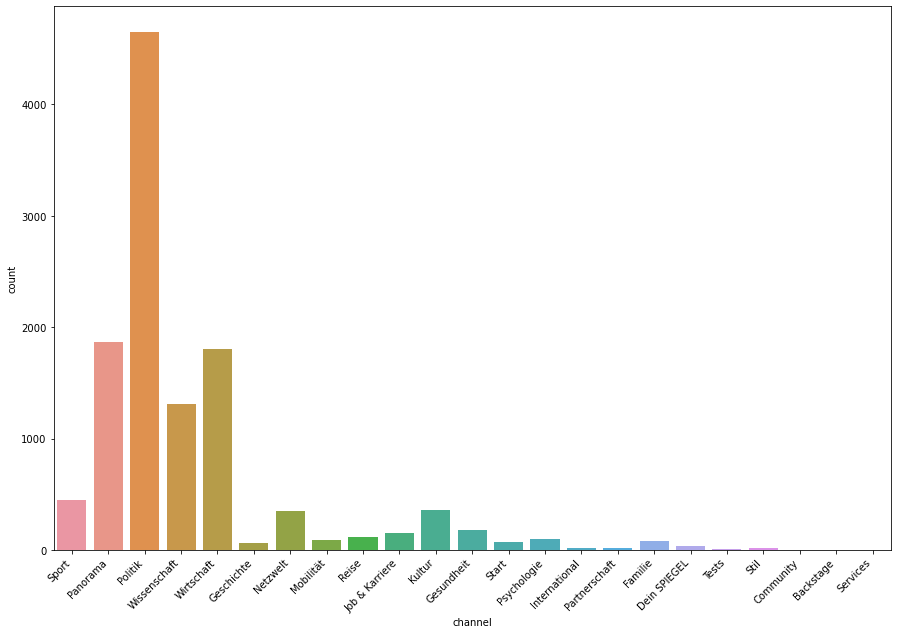

In [851]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x="channel", data=spiegel_covid)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [852]:
channel_dict={}

for unique in list(spiegel_covid["channel"].unique()):
    channel_dict[unique]=spiegel_covid[spiegel_covid["channel"]==unique]["channel"].count()

In [853]:
channel_dict

{'Sport': 449,
 'Panorama': 1865,
 'Politik': 4646,
 'Wissenschaft': 1312,
 'Wirtschaft': 1803,
 'Geschichte': 66,
 'Netzwelt': 348,
 'Mobilität': 93,
 'Reise': 117,
 'Job & Karriere': 155,
 'Kultur': 355,
 'Gesundheit': 183,
 'Start': 73,
 'Psychologie': 100,
 'International': 22,
 'Partnerschaft': 22,
 'Familie': 83,
 'Dein SPIEGEL': 38,
 'Tests': 12,
 'Stil': 20,
 'Community': 2,
 'Backstage': 4,
 'Services': 1}

In [854]:
counts=spiegel_covid["channel"].value_counts()

In [855]:
print("Before deleting channels: ", spiegel_covid.shape)
spiegel_covid = spiegel_covid[~spiegel_covid['channel'].isin(counts[counts < 50].index)]
print("After deleting channels: ", spiegel_covid.shape)

Before deleting channels:  (11769, 7)
After deleting channels:  (11648, 7)


In [856]:
print("Before deleting channels: ", spiegel_covid.shape)
spiegel_covid = spiegel_covid[~spiegel_covid['channel'].isin(["Sport"])]
print("After deleting channels: ", spiegel_covid.shape)

Before deleting channels:  (11648, 7)
After deleting channels:  (11199, 7)


In [857]:
spiegel_covid["headline"]=spiegel_covid["headline"].apply(lambda x: re.sub('»', "", x))
spiegel_covid["headline"]=spiegel_covid["headline"].apply(lambda x: re.sub('«', "", x))
spiegel_covid["headline"]=spiegel_covid["headline"].apply(lambda x: re.sub('–', "", x))
spiegel_covid["headline"]=spiegel_covid["headline"].apply(lambda x: re.sub('-', "", x))

In [858]:
spiegel_covid["original_headline"]=spiegel_covid["original_headline"].apply(lambda x: re.sub('»', "", x))
spiegel_covid["original_headline"]=spiegel_covid["original_headline"].apply(lambda x: re.sub('«', "", x))
spiegel_covid["original_headline"]=spiegel_covid["original_headline"].apply(lambda x: re.sub('–', "", x))
spiegel_covid["original_headline"]=spiegel_covid["original_headline"].apply(lambda x: re.sub('-', "", x))

In [859]:
spiegel_dict = {}

for i in list(spiegel_covid.index):
    #cleaning words_list for every index
    words_list=[]
    words_list+=spiegel_covid["headline"][i].split(' ')
    #words_set=set(words_list)
    for x in words_list:
        if x not in spiegel_dict:
            spiegel_dict[x] = 1
        else:
            spiegel_dict[x] += 1

In [860]:
spiegel_sort=sorted(spiegel_dict.items(), key=lambda x: x[1], reverse=True)
spiegel_sort=spiegel_sort[1:len(spiegel_sort)]
spiegel_sort

[('corona', 663),
 ('coronakrise', 583),
 ('lage', 562),
 ('mehr', 531),
 ('trump', 516),
 ('deutschland', 497),
 ('usa', 437),
 ('coronavirus', 422),
 ('wegen', 384),
 ('deutsch', 375),
 ('neue', 291),
 ('ab', 283),
 ('neu', 281),
 ('morgen', 275),
 ('euro', 253),
 ('menschen', 240),
 ('coronapandemie', 235),
 ('millionen', 232),
 ('merkel', 231),
 ('gut', 229),
 ('warum', 224),
 ('biden', 218),
 ('abend', 217),
 ('gehen', 215),
 ('polizei', 215),
 ('china', 195),
 ('pandemie', 193),
 ('kommen', 187),
 ('zwei', 185),
 ('groß', 184),
 ('fordern', 182),
 ('erst', 182),
 ('milliarden', 178),
 ('leben', 178),
 ('trotzen', 177),
 ('woche', 176),
 ('trumps', 173),
 ('streit', 169),
 ('machen', 164),
 ('lockdown', 163),
 ('berlin', 162),
 ('kampf', 161),
 ('tot', 160),
 ('sollen', 160),
 ('prozent', 159),
 ('wenig', 157),
 ('zurück', 156),
 ('eu', 152),
 ('kinder', 151),
 ('drei', 144),
 ('spahn', 143),
 ('covid19', 142),
 ('schulen', 141),
 ('dürfen', 141),
 ('jahre', 139),
 ('krise', 139),

In [861]:
spiegel_covid["newspaper"]=spiegel_covid["corona_score"].apply(lambda x: "Der Spiegel")

# FRANKFURTER ALLGEMEINE

In [709]:
FA_df=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/FA_part1.csv", index_col=0)
FA_df1=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/FA_part2.csv", index_col=0)
FA_df15=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/FA_part3.csv", index_col=0)
FA_df2=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/FA_biontech.csv", index_col=0)
FA_df3=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/FA_curevac.csv", index_col=0)
FA_df4=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/FA_johnson.csv", index_col=0)
FA_df5=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/FA_moderna.csv", index_col=0)
FA_df6=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/FA_astrazeneca.csv", index_col=0)

In [710]:
FA=pd.concat([FA_df,FA_df1,FA_df15,FA_df2,FA_df3,FA_df3,FA_df4,FA_df5,FA_df6],axis=0)
FA.reset_index(drop=True, inplace=True)

In [711]:
print("with duplicates: ", FA.shape)
FA.drop_duplicates(inplace=True)
print("w/o duplicates: ", FA.shape)

with duplicates:  (28779, 5)
w/o duplicates:  (26617, 5)


In [712]:
FA

,title,subtitle,date_published,url,is_paid
0,\n\t\t\t\t\t\t\tSo wenige Insolvenzen wie seit...,\n\t\t\t\t\t\tIn der Corona-Krise wurden viele...,2021-03-31T10:37:27+0200,https://www.faz.net/suche/trotz-corona-so-weni...,False
1,\n\t\t\t\t\t\t\tJunge Wissenschaftler stehen u...,\n\t\t\t\t\t\tDas Virus stellt den Arbeitsallt...,2021-03-31T10:18:08+0200,https://www.faz.net/suche/corona-forschung-jun...,False
2,\n\t\t\t\t\t\t\tZahl der Arbeitslosen sinkt de...,\n\t\t\t\t\t\tTrotz des Lockdowns und steigend...,2021-03-31T09:57:29+0200,https://www.faz.net/suche/arbeitslosen-zahl-in...,False
3,\n\t\t\t\t\t\t\tKehren die goldenen Zeiten zur...,\n\t\t\t\t\t\tDer Goldpreis hat seit August de...,2021-03-31T09:25:49+0200,https://www.faz.net/suche/goldpreis-der-preis-...,False
4,\n\t\t\t\t\t\t\tMessebauer findet neue Kunden ...,\n\t\t\t\t\t\tDie Ausstellungs- und Eventbranc...,2021-03-31T09:12:00+0200,https://www.faz.net/suche/corona-messebauer-fi...,False
...,...,...,...,...,...
28774,\n\t\t\t\t\t\t\tAnlehnungsbedarf in der Pharma...,\n\t\t\t\t\t\tKaum eine Branche schien über la...,2002-07-16T12:00:00+0200,https://www.faz.net/premiumContent?contentId=1...,False
28775,\n\t\t\t\t\t\t\tMit Leerverkäufen lässt sich g...,\n\t\t\t\t\t\tLeerverkäufer haben einen schlec...,2002-07-04T14:24:28+0200,https://www.faz.net/premiumContent?contentId=1...,False
28776,\n\t\t\t\t\t\t\tGlaxo und Biogen erfahren Sege...,\n\t\t\t\t\t\tGlaxoSmithKline verliert den Pat...,2002-05-24T13:17:43+0200,https://www.faz.net/premiumContent?contentId=1...,False
28777,\n\t\t\t\t\t\t\tFusionsfantasie lebt neu auf\n...,\n\t\t\t\t\t\tFusionen und Übernahmen gehören ...,2002-04-24T23:00:00+0200,https://www.faz.net/premiumContent?contentId=1...,False


#### Cleaning FA Dataframe

In [713]:
def data_clean(x):
    x=str(x)
    return x[:10]

In [714]:
FA["date_published"]=FA["date_published"].apply(lambda x: data_clean(x))

In [715]:
FA=FA[FA["date_published"]>'2019-11-30']
#FA_copy=FA_copy[FA_copy["date_published"]>'2019-11-30']

In [716]:
cols=["title","subtitle"]

In [717]:
for col in cols:
    FA[col]=FA[col].apply(lambda x: re.sub("\t", "", x))
    FA[col]=FA[col].apply(lambda x: re.sub("\n", "", x))
    FA[col]=FA[col].apply(lambda x: re.sub('„', "", x))
    FA[col]=FA[col].apply(lambda x: re.sub('"', "", x))
    FA[col]=FA[col].apply(lambda x: re.sub('“', "", x))

<ipython-input-717-62934ff2e1f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA[col]=FA[col].apply(lambda x: re.sub("\t", "", x))
<ipython-input-717-62934ff2e1f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA[col]=FA[col].apply(lambda x: re.sub("\n", "", x))
<ipython-input-717-62934ff2e1f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [719]:
FA["original_headline"]=FA["title"]+FA["subtitle"]

<ipython-input-719-1a41235c46aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA["original_headline"]=FA["title"]+FA["subtitle"]


In [720]:
FA

,title,subtitle,date_published,url,is_paid,original_headline
0,So wenige Insolvenzen wie seit zwei Jahrzehnte...,In der Corona-Krise wurden viele Unternehmensi...,2021-03-31,https://www.faz.net/suche/trotz-corona-so-weni...,False,So wenige Insolvenzen wie seit zwei Jahrzehnte...
1,Junge Wissenschaftler stehen unter hohem Druck...,Das Virus stellt den Arbeitsalltag von Forsche...,2021-03-31,https://www.faz.net/suche/corona-forschung-jun...,False,Junge Wissenschaftler stehen unter hohem Druck...
2,Zahl der Arbeitslosen sinkt deutlich,Trotz des Lockdowns und steigender Infektionsz...,2021-03-31,https://www.faz.net/suche/arbeitslosen-zahl-in...,False,Zahl der Arbeitslosen sinkt deutlich Tr...
3,Kehren die goldenen Zeiten zurück?,Der Goldpreis hat seit August deutlich verlore...,2021-03-31,https://www.faz.net/suche/goldpreis-der-preis-...,False,Kehren die goldenen Zeiten zurück? Der ...
4,Messebauer findet neue Kunden in der Wüste ...,Die Ausstellungs- und Eventbranche darbt wegen...,2021-03-31,https://www.faz.net/suche/corona-messebauer-fi...,False,Messebauer findet neue Kunden in der Wüste ...
...,...,...,...,...,...,...
28487,Chef von Astra-Zeneca weist Vorwürfe der EU zu...,"Die EU habe keinen Grund, über Lieferengpässe ...",2021-01-27,https://www.faz.net/premiumContent?contentId=1...,False,Chef von Astra-Zeneca weist Vorwürfe der EU zu...
28523,Macron warnt vor Artensterben,Auf dem Klimagipfel in Paris geht es nicht zul...,2021-01-11,https://www.faz.net/premiumContent?contentId=1...,False,Macron warnt vor Artensterben Auf dem K...
28573,Kritik am Impfstoff von AstraZeneca,Es seien auf Basis völlig unterschiedlicher St...,2020-11-27,https://www.faz.net/suche/impfstoff-von-astraz...,False,Kritik am Impfstoff von AstraZeneca Es ...
28609,Trump verkündet Notfallgenehmigung für Plasmat...,Amerikas Präsident meldet einen historischen D...,2020-08-24,https://www.faz.net/premiumContent?contentId=1...,False,Trump verkündet Notfallgenehmigung für Plasmat...


In [296]:
import re
import string

def cleaning_punctuation(x):
    x=str(x)
    x=x.lower()
    remove = string.punctuation
    remove = remove.replace("-", "")
    remove = remove.replace("/", "")
    remove = remove.replace("&", "")# don't remove hyphens
    pattern = r"[{}]".format(remove)
    x=re.sub(pattern, "", x)
    return x

In [721]:
cols=["title", "subtitle"]

In [722]:
for col in cols:
    FA[col]=FA[col].apply(lambda x: cleaning_punctuation(x))

<ipython-input-722-9d3a608a8214>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA[col]=FA[col].apply(lambda x: cleaning_punctuation(x))


In [723]:
for col in cols:
    FA[col]=FA[col].apply(lambda x: stop_word_removal(x))
    FA[col]=FA[col].apply(lambda x: lemmatizer(x))

<ipython-input-723-204af710911d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA[col]=FA[col].apply(lambda x: stop_word_removal(x))
<ipython-input-723-204af710911d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA[col]=FA[col].apply(lambda x: lemmatizer(x))


In [728]:
FA["headline"]=FA["title"]+" "+FA["subtitle"]

<ipython-input-728-79a8b42a4d98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA["headline"]=FA["title"]+" "+FA["subtitle"]


In [729]:
FA["headline"][0]

'wenig insolvenzen seit zwei jahrzehnten corona-krise werden viel unternehmensinsolvenzen befürchten eintreten zahl sogar stark fallen daran politik anteil schon bald dynamik ändern'

In [730]:
corona_list=["schnelltest","teststrategie","intensivbetten","intensivstationen","impfung","impfstrategie","impfen","impflinge","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","astra-zeneca","oxford","janssen"]
#corona_list=[]


def corona_related(x):
    temp_list=x.split(' ')

    score=0
    
    for word in temp_list:
        #print(word)
        if word in corona_list:
            score_corona=1
            #print(score)
            return score_corona
        
        elif word in list(keywords_zeit["keyword"]):
            score+=1
            #print(score)
        else:
            continue
            
    return score/(len(temp_list))

In [731]:
FA["corona_score"]=FA["headline"].apply(lambda x: corona_related(x))

<ipython-input-731-6429e99643ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA["corona_score"]=FA["headline"].apply(lambda x: corona_related(x))


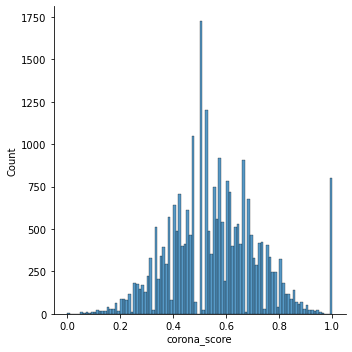

In [732]:
sns.displot(FA["corona_score"],bins=100)
plt.show()

In [733]:
FA_covid=FA[FA["corona_score"]>0.49]

In [734]:
FA_covid["newspaper"]=FA["corona_score"].apply(lambda x: "Frankfurter Allgemeine")

<ipython-input-734-b11fc4fe0308>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA_covid["newspaper"]=FA["corona_score"].apply(lambda x: "Frankfurter Allgemeine")


In [735]:
FA_covid

,title,subtitle,date_published,url,is_paid,original_headline,headline,corona_score,newspaper
0,wenig insolvenzen seit zwei jahrzehnten,corona-krise werden viel unternehmensinsolvenz...,2021-03-31,https://www.faz.net/suche/trotz-corona-so-weni...,False,So wenige Insolvenzen wie seit zwei Jahrzehnte...,wenig insolvenzen seit zwei jahrzehnten corona...,0.772727,Frankfurter Allgemeine
1,junge wissenschaftler stehen hoch druck,virus stellen arbeitsalltag forschern kopf bes...,2021-03-31,https://www.faz.net/suche/corona-forschung-jun...,False,Junge Wissenschaftler stehen unter hohem Druck...,junge wissenschaftler stehen hoch druck virus ...,0.850000,Frankfurter Allgemeine
2,zahl arbeitslos sinken deutlich,trotzen lockdowns steigend infektionszahlen ge...,2021-03-31,https://www.faz.net/suche/arbeitslosen-zahl-in...,False,Zahl der Arbeitslosen sinkt deutlich Tr...,zahl arbeitslos sinken deutlich trotzen lockdo...,0.941176,Frankfurter Allgemeine
3,kehren golden zeiten zurück,goldpreis seit august deutlich verlieren daran...,2021-03-31,https://www.faz.net/suche/goldpreis-der-preis-...,False,Kehren die goldenen Zeiten zurück? Der ...,kehren golden zeiten zurück goldpreis seit aug...,0.700000,Frankfurter Allgemeine
4,messebauer finden neue kunden wüst,ausstellungs- eventbranche darben wegen corona...,2021-03-31,https://www.faz.net/suche/corona-messebauer-fi...,False,Messebauer findet neue Kunden in der Wüste ...,messebauer finden neue kunden wüst ausstellung...,0.500000,Frankfurter Allgemeine
...,...,...,...,...,...,...,...,...,...
28486,knistern astra-zeneca eu,schwedisch-britische pharmaunternehmen astra-z...,2021-01-27,https://www.faz.net/suche/streit-zwischen-astr...,False,Es knistert zwischen Astra-Zeneca und der EU ...,knistern astra-zeneca eu schwedisch-britische ...,1.000000,Frankfurter Allgemeine
28487,chef astra-zeneca weisen vorwürfe eu zurück,eu grund lieferengpässe klagen sagen pascal so...,2021-01-27,https://www.faz.net/premiumContent?contentId=1...,False,Chef von Astra-Zeneca weist Vorwürfe der EU zu...,chef astra-zeneca weisen vorwürfe eu zurück eu...,1.000000,Frankfurter Allgemeine
28523,macron warnen artensterben,klimagipfel paris gehen zuletzt zusammenhang u...,2021-01-11,https://www.faz.net/premiumContent?contentId=1...,False,Macron warnt vor Artensterben Auf dem K...,macron warnen artensterben klimagipfel paris g...,0.736842,Frankfurter Allgemeine
28573,kritik impfstoff astrazeneca,sein basis völlig unterschiedlich studienverlä...,2020-11-27,https://www.faz.net/suche/impfstoff-von-astraz...,False,Kritik am Impfstoff von AstraZeneca Es ...,kritik impfstoff astrazeneca sein basis völlig...,1.000000,Frankfurter Allgemeine


### FRANKFRUTER ALLGEMEINE: Vaccine dictonary

In [736]:
vaccine=["biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","astra-zeneca","oxford","janssen"]


def vaccine_mentioned(x):
    temp_list=x.split(' ')
    
    for word in temp_list:
        #print(word)
        if word in vaccine:
            return word

        else:
            return "n/a"       


In [737]:
FA_covid["vaccine"]=FA_covid["headline"].apply(lambda x: vaccine_mentioned(x))

<ipython-input-737-5281dc38da60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA_covid["vaccine"]=FA_covid["headline"].apply(lambda x: vaccine_mentioned(x))


In [738]:
FA_covid

,title,subtitle,date_published,url,is_paid,original_headline,headline,corona_score,newspaper,vaccine
0,wenig insolvenzen seit zwei jahrzehnten,corona-krise werden viel unternehmensinsolvenz...,2021-03-31,https://www.faz.net/suche/trotz-corona-so-weni...,False,So wenige Insolvenzen wie seit zwei Jahrzehnte...,wenig insolvenzen seit zwei jahrzehnten corona...,0.772727,Frankfurter Allgemeine,n/a
1,junge wissenschaftler stehen hoch druck,virus stellen arbeitsalltag forschern kopf bes...,2021-03-31,https://www.faz.net/suche/corona-forschung-jun...,False,Junge Wissenschaftler stehen unter hohem Druck...,junge wissenschaftler stehen hoch druck virus ...,0.850000,Frankfurter Allgemeine,n/a
2,zahl arbeitslos sinken deutlich,trotzen lockdowns steigend infektionszahlen ge...,2021-03-31,https://www.faz.net/suche/arbeitslosen-zahl-in...,False,Zahl der Arbeitslosen sinkt deutlich Tr...,zahl arbeitslos sinken deutlich trotzen lockdo...,0.941176,Frankfurter Allgemeine,n/a
3,kehren golden zeiten zurück,goldpreis seit august deutlich verlieren daran...,2021-03-31,https://www.faz.net/suche/goldpreis-der-preis-...,False,Kehren die goldenen Zeiten zurück? Der ...,kehren golden zeiten zurück goldpreis seit aug...,0.700000,Frankfurter Allgemeine,n/a
4,messebauer finden neue kunden wüst,ausstellungs- eventbranche darben wegen corona...,2021-03-31,https://www.faz.net/suche/corona-messebauer-fi...,False,Messebauer findet neue Kunden in der Wüste ...,messebauer finden neue kunden wüst ausstellung...,0.500000,Frankfurter Allgemeine,n/a
...,...,...,...,...,...,...,...,...,...,...
28486,knistern astra-zeneca eu,schwedisch-britische pharmaunternehmen astra-z...,2021-01-27,https://www.faz.net/suche/streit-zwischen-astr...,False,Es knistert zwischen Astra-Zeneca und der EU ...,knistern astra-zeneca eu schwedisch-britische ...,1.000000,Frankfurter Allgemeine,n/a
28487,chef astra-zeneca weisen vorwürfe eu zurück,eu grund lieferengpässe klagen sagen pascal so...,2021-01-27,https://www.faz.net/premiumContent?contentId=1...,False,Chef von Astra-Zeneca weist Vorwürfe der EU zu...,chef astra-zeneca weisen vorwürfe eu zurück eu...,1.000000,Frankfurter Allgemeine,n/a
28523,macron warnen artensterben,klimagipfel paris gehen zuletzt zusammenhang u...,2021-01-11,https://www.faz.net/premiumContent?contentId=1...,False,Macron warnt vor Artensterben Auf dem K...,macron warnen artensterben klimagipfel paris g...,0.736842,Frankfurter Allgemeine,n/a
28573,kritik impfstoff astrazeneca,sein basis völlig unterschiedlich studienverlä...,2020-11-27,https://www.faz.net/suche/impfstoff-von-astraz...,False,Kritik am Impfstoff von AstraZeneca Es ...,kritik impfstoff astrazeneca sein basis völlig...,1.000000,Frankfurter Allgemeine,n/a


In [739]:
FA_covid["vaccine"].value_counts()

n/a             16993
astra-zeneca       19
biontech           19
curevac            12
astrazeneca         6
moderna             6
pfizer              5
Name: vaccine, dtype: int64

In [740]:
FA["vaccine"]=FA["headline"].apply(lambda x: vaccine_mentioned(x))

<ipython-input-740-541c0a2f861c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA["vaccine"]=FA["headline"].apply(lambda x: vaccine_mentioned(x))


In [741]:
FA["vaccine"].value_counts()

n/a             26310
astra-zeneca       19
biontech           19
curevac            12
astrazeneca         6
moderna             6
pfizer              5
Name: vaccine, dtype: int64

### DIE ZEIT: Vaccine dictonary

In [862]:
zeit_covid.columns

Index(['title', 'release_date', 'snippet', 'teaser_text', 'teaser_title',
       'href', 'original_headline', 'newspaper', 'headline', 'channel'],
      dtype='object')

In [864]:
zeit_covid["vaccine"]=zeit_covid["headline"].apply(lambda x: vaccine_mentioned(x))

In [865]:
zeit_covid["vaccine"].value_counts()

n/a            9520
astrazeneca      21
biontech         14
curevac          11
pfizer            5
moderna           2
Name: vaccine, dtype: int64

### DER SPIEGEL: Vaccine dictonary

In [866]:
spiegel_covid["vaccine"]=spiegel_covid["headline"].apply(lambda x: vaccine_mentioned(x))

In [867]:
spiegel_covid["vaccine"].value_counts()

n/a            11178
biontech          11
astrazeneca        8
curevac            1
moderna            1
Name: vaccine, dtype: int64

### Creating df_model

In [868]:
zeit_covid.columns

Index(['title', 'release_date', 'snippet', 'teaser_text', 'teaser_title',
       'href', 'original_headline', 'newspaper', 'headline', 'channel',
       'vaccine'],
      dtype='object')

In [869]:
rename_zeit={'title':"title", 'release_date':"date_published", 'snippet':"snippet", 'teaser_text':"teaser_text", 'teaser_title':"teaser_title",
       'href':"url",'original_headline':'original_headline', 'channel':"channel", 'newspaper':"newspaper", 'headline':"headline", 'vaccine':"vaccine"}


In [870]:
zeit_covid=zeit_covid.rename(columns=rename_zeit)
zeit_covid

,title,date_published,snippet,teaser_text,teaser_title,url,original_headline,newspaper,headline,channel,vaccine
0,ne runden,2020-03-21,tatsächlich erwachsen langweilig 2 7 spieler a...,spätestens tag homeoffice homeschooling partie...,ne runden,http://www.zeit.de/kultur/2020-03/gesellschaft...,Noch 'ne Runde! tatsächlich auch für Erwachsen...,Die Zeit,ne rundentatsächlich erwachsen langweilig 2 7 ...,kultur,n/a
1,gewinnen verlierer,2020-03-21,schweigen möglichkeiten gut mensch okay vielle...,klaren sollen hause bleiben zeit gesellschafts...,gewinnen verlierer,http://www.zeit.de/kultur/2020-03/corona-quara...,Gewinnen ist was für Verlierer? mir schweigend...,Die Zeit,gewinnen verliererschweigen möglichkeiten gut ...,kultur,n/a
2,corona staat,2020-03-21,dennoch allzu vorsichtig wer rechtzeitig hande...,regierend testen coronakrise gesetzliche grenz...,corona staat,http://www.zeit.de/kultur/2020-03/staat-ausnah...,Corona und der Staat dennoch nicht allzu vorsi...,Die Zeit,corona staatdennoch allzu vorsichtig wer recht...,kultur,n/a
3,kleine änderungen alltag bewirken,2020-03-21,provisorisch corona-krankenhäusern quarantäne-...,mingjun leben wuhan ursprungsort coronavirus-p...,kleine änderungen alltag bewirken,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"""Kleine Änderungen im Alltag können viel bewir...",Die Zeit,kleine änderungen alltag bewirkenprovisorisch ...,gesellschaft,n/a
4,eigentlich sein gerne familie,2020-03-21,eigentlich wollen sommer italien spanien slowe...,ausgangssperren unis flüge streichen corona-kr...,eigentlich sein gerne familie,http://www.zeit.de/campus/2020-03/auslandsseme...,"""Eigentlich wäre ich jetzt gerne bei meiner Fa...",Die Zeit,eigentlich sein gerne familieeigentlich wollen...,campus,n/a
...,...,...,...,...,...,...,...,...,...,...,...
10157,trotzen astrazeneca-impfstaus lehnen bundesreg...,2021-03-01,astrazeneca öffentlich impfen lassen sollen wi...,ende woche sollen mehr million dosen vakzine a...,trotzen astrazeneca-impfstaus lehnen bundesreg...,http://www.zeit.de/politik/deutschland/2021-03...,Trotz AstraZeneca-Impfstaus lehnt Bundesregier...,Die Zeit,trotzen astrazeneca-impfstaus lehnen bundesreg...,politik,n/a
10159,thüringen stoppen vergabe impfterminen,2021-03-13,gesundheitsministeriums erfurt sollen dafür kn...,astrazeneca liefern erneut wenig impfstoff zei...,thüringen stoppen vergabe impfterminen,http://www.zeit.de/wissen/gesundheit/2021-03/c...,Thüringen stoppt Vergabe von Impfterminen Gesu...,Die Zeit,thüringen stoppen vergabe impfterminengesundhe...,wissen,n/a
10160,groß impfversprechen,2021-03-12,skizzieren möglich ablauf praxen bestellen jew...,ab april 700000 impfungen pro tag kanzlerin zu...,groß impfversprechen,http://www.zeit.de/politik/2021-03/corona-impf...,Das große Impfversprechen skizziert einen mögl...,Die Zeit,groß impfversprechenskizzieren möglich ablauf ...,politik,n/a
10165,jens spahn lässt abweichungen impfpriorisierung,2021-03-10,moderna abstand zweitimpfung sechs wochen auss...,altersbeschränkung mehr astrazeneca groß absta...,jens spahn lässt abweichungen impfpriorisierung,http://www.zeit.de/wissen/gesundheit/2021-03/j...,Jens Spahn lässt Abweichungen von Impfpriorisi...,Die Zeit,jens spahn lässt abweichungen impfpriorisierun...,wissen,n/a


In [871]:
spiegel_covid.columns

Index(['url', 'headline', 'is_paid', 'date_published', 'channel',
       'original_headline', 'corona_score', 'newspaper', 'vaccine'],
      dtype='object')

In [872]:
FA_covid

,title,subtitle,date_published,url,is_paid,original_headline,headline,corona_score,newspaper,vaccine
0,wenig insolvenzen seit zwei jahrzehnten,corona-krise werden viel unternehmensinsolvenz...,2021-03-31,https://www.faz.net/suche/trotz-corona-so-weni...,False,So wenige Insolvenzen wie seit zwei Jahrzehnte...,wenig insolvenzen seit zwei jahrzehnten corona...,0.772727,Frankfurter Allgemeine,n/a
1,junge wissenschaftler stehen hoch druck,virus stellen arbeitsalltag forschern kopf bes...,2021-03-31,https://www.faz.net/suche/corona-forschung-jun...,False,Junge Wissenschaftler stehen unter hohem Druck...,junge wissenschaftler stehen hoch druck virus ...,0.850000,Frankfurter Allgemeine,n/a
2,zahl arbeitslos sinken deutlich,trotzen lockdowns steigend infektionszahlen ge...,2021-03-31,https://www.faz.net/suche/arbeitslosen-zahl-in...,False,Zahl der Arbeitslosen sinkt deutlich Tr...,zahl arbeitslos sinken deutlich trotzen lockdo...,0.941176,Frankfurter Allgemeine,n/a
3,kehren golden zeiten zurück,goldpreis seit august deutlich verlieren daran...,2021-03-31,https://www.faz.net/suche/goldpreis-der-preis-...,False,Kehren die goldenen Zeiten zurück? Der ...,kehren golden zeiten zurück goldpreis seit aug...,0.700000,Frankfurter Allgemeine,n/a
4,messebauer finden neue kunden wüst,ausstellungs- eventbranche darben wegen corona...,2021-03-31,https://www.faz.net/suche/corona-messebauer-fi...,False,Messebauer findet neue Kunden in der Wüste ...,messebauer finden neue kunden wüst ausstellung...,0.500000,Frankfurter Allgemeine,n/a
...,...,...,...,...,...,...,...,...,...,...
28486,knistern astra-zeneca eu,schwedisch-britische pharmaunternehmen astra-z...,2021-01-27,https://www.faz.net/suche/streit-zwischen-astr...,False,Es knistert zwischen Astra-Zeneca und der EU ...,knistern astra-zeneca eu schwedisch-britische ...,1.000000,Frankfurter Allgemeine,n/a
28487,chef astra-zeneca weisen vorwürfe eu zurück,eu grund lieferengpässe klagen sagen pascal so...,2021-01-27,https://www.faz.net/premiumContent?contentId=1...,False,Chef von Astra-Zeneca weist Vorwürfe der EU zu...,chef astra-zeneca weisen vorwürfe eu zurück eu...,1.000000,Frankfurter Allgemeine,n/a
28523,macron warnen artensterben,klimagipfel paris gehen zuletzt zusammenhang u...,2021-01-11,https://www.faz.net/premiumContent?contentId=1...,False,Macron warnt vor Artensterben Auf dem K...,macron warnen artensterben klimagipfel paris g...,0.736842,Frankfurter Allgemeine,n/a
28573,kritik impfstoff astrazeneca,sein basis völlig unterschiedlich studienverlä...,2020-11-27,https://www.faz.net/suche/impfstoff-von-astraz...,False,Kritik am Impfstoff von AstraZeneca Es ...,kritik impfstoff astrazeneca sein basis völlig...,1.000000,Frankfurter Allgemeine,n/a


In [873]:
test=pd.concat([zeit_covid,spiegel_covid,FA_covid], axis=0, ignore_index=False)
test.drop(["title","snippet","subtitle","teaser_text","teaser_title","is_paid","corona_score"],axis=1,inplace=True)
test

,date_published,url,original_headline,newspaper,headline,channel,vaccine
0,2020-03-21,http://www.zeit.de/kultur/2020-03/gesellschaft...,Noch 'ne Runde! tatsächlich auch für Erwachsen...,Die Zeit,ne rundentatsächlich erwachsen langweilig 2 7 ...,kultur,n/a
1,2020-03-21,http://www.zeit.de/kultur/2020-03/corona-quara...,Gewinnen ist was für Verlierer? mir schweigend...,Die Zeit,gewinnen verliererschweigen möglichkeiten gut ...,kultur,n/a
2,2020-03-21,http://www.zeit.de/kultur/2020-03/staat-ausnah...,Corona und der Staat dennoch nicht allzu vorsi...,Die Zeit,corona staatdennoch allzu vorsichtig wer recht...,kultur,n/a
3,2020-03-21,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"""Kleine Änderungen im Alltag können viel bewir...",Die Zeit,kleine änderungen alltag bewirkenprovisorisch ...,gesellschaft,n/a
4,2020-03-21,http://www.zeit.de/campus/2020-03/auslandsseme...,"""Eigentlich wäre ich jetzt gerne bei meiner Fa...",Die Zeit,eigentlich sein gerne familieeigentlich wollen...,campus,n/a
...,...,...,...,...,...,...,...
28486,2021-01-27,https://www.faz.net/suche/streit-zwischen-astr...,Es knistert zwischen Astra-Zeneca und der EU ...,Frankfurter Allgemeine,knistern astra-zeneca eu schwedisch-britische ...,NaN,n/a
28487,2021-01-27,https://www.faz.net/premiumContent?contentId=1...,Chef von Astra-Zeneca weist Vorwürfe der EU zu...,Frankfurter Allgemeine,chef astra-zeneca weisen vorwürfe eu zurück eu...,NaN,n/a
28523,2021-01-11,https://www.faz.net/premiumContent?contentId=1...,Macron warnt vor Artensterben Auf dem K...,Frankfurter Allgemeine,macron warnen artensterben klimagipfel paris g...,NaN,n/a
28573,2020-11-27,https://www.faz.net/suche/impfstoff-von-astraz...,Kritik am Impfstoff von AstraZeneca Es ...,Frankfurter Allgemeine,kritik impfstoff astrazeneca sein basis völlig...,NaN,n/a


In [874]:
test=test.reset_index(drop=True)
test

,date_published,url,original_headline,newspaper,headline,channel,vaccine
0,2020-03-21,http://www.zeit.de/kultur/2020-03/gesellschaft...,Noch 'ne Runde! tatsächlich auch für Erwachsen...,Die Zeit,ne rundentatsächlich erwachsen langweilig 2 7 ...,kultur,n/a
1,2020-03-21,http://www.zeit.de/kultur/2020-03/corona-quara...,Gewinnen ist was für Verlierer? mir schweigend...,Die Zeit,gewinnen verliererschweigen möglichkeiten gut ...,kultur,n/a
2,2020-03-21,http://www.zeit.de/kultur/2020-03/staat-ausnah...,Corona und der Staat dennoch nicht allzu vorsi...,Die Zeit,corona staatdennoch allzu vorsichtig wer recht...,kultur,n/a
3,2020-03-21,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"""Kleine Änderungen im Alltag können viel bewir...",Die Zeit,kleine änderungen alltag bewirkenprovisorisch ...,gesellschaft,n/a
4,2020-03-21,http://www.zeit.de/campus/2020-03/auslandsseme...,"""Eigentlich wäre ich jetzt gerne bei meiner Fa...",Die Zeit,eigentlich sein gerne familieeigentlich wollen...,campus,n/a
...,...,...,...,...,...,...,...
37827,2021-01-27,https://www.faz.net/suche/streit-zwischen-astr...,Es knistert zwischen Astra-Zeneca und der EU ...,Frankfurter Allgemeine,knistern astra-zeneca eu schwedisch-britische ...,NaN,n/a
37828,2021-01-27,https://www.faz.net/premiumContent?contentId=1...,Chef von Astra-Zeneca weist Vorwürfe der EU zu...,Frankfurter Allgemeine,chef astra-zeneca weisen vorwürfe eu zurück eu...,NaN,n/a
37829,2021-01-11,https://www.faz.net/premiumContent?contentId=1...,Macron warnt vor Artensterben Auf dem K...,Frankfurter Allgemeine,macron warnen artensterben klimagipfel paris g...,NaN,n/a
37830,2020-11-27,https://www.faz.net/suche/impfstoff-von-astraz...,Kritik am Impfstoff von AstraZeneca Es ...,Frankfurter Allgemeine,kritik impfstoff astrazeneca sein basis völlig...,NaN,n/a


In [875]:
order=['url', 'original_headline', 'headline', 'date_published', "channel" ,'newspaper',
       'vaccine']

In [876]:
test=test[order]

In [877]:
test

,url,original_headline,headline,date_published,channel,newspaper,vaccine
0,http://www.zeit.de/kultur/2020-03/gesellschaft...,Noch 'ne Runde! tatsächlich auch für Erwachsen...,ne rundentatsächlich erwachsen langweilig 2 7 ...,2020-03-21,kultur,Die Zeit,n/a
1,http://www.zeit.de/kultur/2020-03/corona-quara...,Gewinnen ist was für Verlierer? mir schweigend...,gewinnen verliererschweigen möglichkeiten gut ...,2020-03-21,kultur,Die Zeit,n/a
2,http://www.zeit.de/kultur/2020-03/staat-ausnah...,Corona und der Staat dennoch nicht allzu vorsi...,corona staatdennoch allzu vorsichtig wer recht...,2020-03-21,kultur,Die Zeit,n/a
3,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"""Kleine Änderungen im Alltag können viel bewir...",kleine änderungen alltag bewirkenprovisorisch ...,2020-03-21,gesellschaft,Die Zeit,n/a
4,http://www.zeit.de/campus/2020-03/auslandsseme...,"""Eigentlich wäre ich jetzt gerne bei meiner Fa...",eigentlich sein gerne familieeigentlich wollen...,2020-03-21,campus,Die Zeit,n/a
...,...,...,...,...,...,...,...
37827,https://www.faz.net/suche/streit-zwischen-astr...,Es knistert zwischen Astra-Zeneca und der EU ...,knistern astra-zeneca eu schwedisch-britische ...,2021-01-27,NaN,Frankfurter Allgemeine,n/a
37828,https://www.faz.net/premiumContent?contentId=1...,Chef von Astra-Zeneca weist Vorwürfe der EU zu...,chef astra-zeneca weisen vorwürfe eu zurück eu...,2021-01-27,NaN,Frankfurter Allgemeine,n/a
37829,https://www.faz.net/premiumContent?contentId=1...,Macron warnt vor Artensterben Auf dem K...,macron warnen artensterben klimagipfel paris g...,2021-01-11,NaN,Frankfurter Allgemeine,n/a
37830,https://www.faz.net/suche/impfstoff-von-astraz...,Kritik am Impfstoff von AstraZeneca Es ...,kritik impfstoff astrazeneca sein basis völlig...,2020-11-27,NaN,Frankfurter Allgemeine,n/a


In [878]:
test["vaccine"].value_counts()

n/a             37691
biontech           44
astrazeneca        35
curevac            24
astra-zeneca       19
pfizer             10
moderna             9
Name: vaccine, dtype: int64

In [879]:
test.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/df_model.csv")

print("Sucessfully saved")

Sucessfully saved
